In [1]:
!pip install mlxtend 

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
book=pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df=pd.get_dummies(book)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [28]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.423,(ChildBks),1
1,0.431,(CookBks),1


In [29]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) & (frequent_itemsets['support'] <=0.8)]

,support,itemsets,length
0,0.423,(ChildBks),1
1,0.431,(CookBks),1


In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [31]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [33]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] <=0.8)]

,support,itemsets,length
7,0.256,"(CookBks, ChildBks)",2


In [34]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules
rules.sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [35]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length


In [36]:
frequent_itemsets[ (frequent_itemsets['length'] == 4) & (frequent_itemsets['support'] <=0.9)]

,support,itemsets,length


In [39]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules
rules.sort_values('lift',ascending = False).head()

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [40]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.423,(ChildBks),1
1,0.431,(CookBks),1


In [41]:
frequent_itemsets[ (frequent_itemsets['length'] == 5) & (frequent_itemsets['support'] <=0.5)]

,support,itemsets,length


In [42]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=7)
rules
rules.sort_values('lift',ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


<AxesSubplot:>

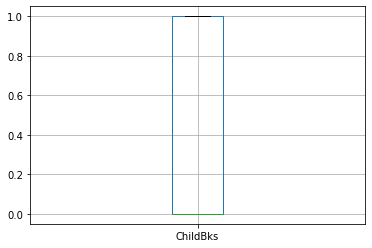

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
book.boxplot(column=['ChildBks'])

<AxesSubplot:>

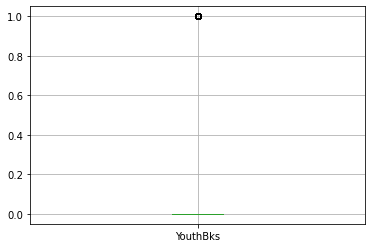

In [44]:
book.boxplot(column=['YouthBks'])

<AxesSubplot:>

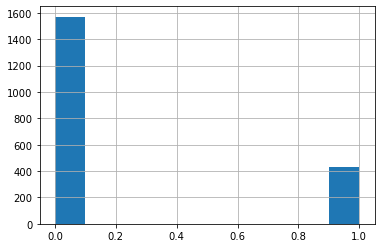

In [45]:
book['RefBks'].hist()

<AxesSubplot:>

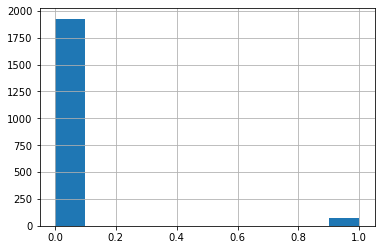

In [48]:
book['ItalAtlas'].hist()

<AxesSubplot:>

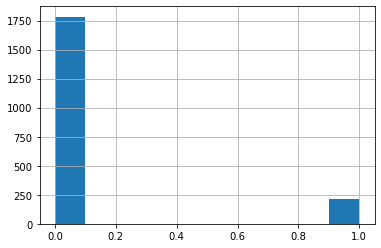

In [49]:
book['Florence'].hist()

(array([1926.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          74.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

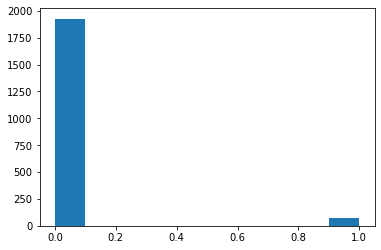

In [50]:
plt.hist(book["ItalAtlas"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2be72d4fc70>,
 'caps': [<matplotlib.lines.Line2D at 0x2be72d5e3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2be72d4f8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2be72d5eaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2be72d5ee80>],
 'means': []}

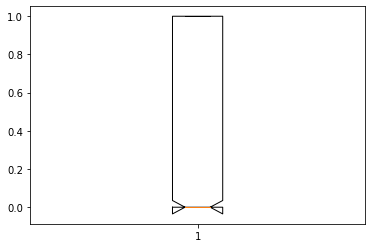

In [51]:
plt.boxplot(book["GeogBks"],'bo')

{'whiskers': [<matplotlib.lines.Line2D at 0x2be72dbe790>,
 'caps': [<matplotlib.lines.Line2D at 0x2be72dbeeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2be72dbe400>],
 'medians': [<matplotlib.lines.Line2D at 0x2be72dcd5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2be72dcd940>],
 'means': []}

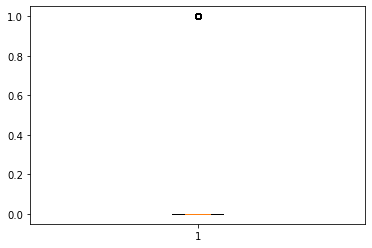

In [52]:
plt.boxplot(book["ItalCook"],'bo')

{'whiskers': [<matplotlib.lines.Line2D at 0x2be72e0bdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x2be72e16550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2be72e0ba60>],
 'medians': [<matplotlib.lines.Line2D at 0x2be72e16c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2be72e21040>],
 'means': []}

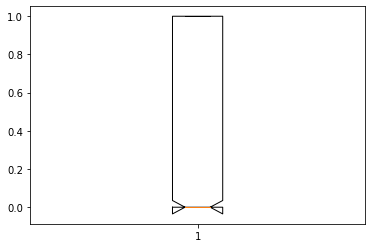

In [53]:
plt.boxplot(book["ChildBks"],'bo')